## Dental Panoramic Selection
- under 22 and 22OrOver years old


In [1]:
import pandas as pd

import os
cwd = os.getcwd()

# Shows Current Working Directory
print(cwd)

/home/manu/pdi-projects/Dental_Age


In [2]:
# Get the pickle (Serialized Python object structure)
unpickled_df = pd.read_pickle(cwd + "/data/raw_dataframe_no_name.pkl")

In [3]:
unpickled_df

,PatientID,pixel_array,PatientBirthDate,AcquisitionDate
0,20211130164452720,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",20090701,20211130
1,20220210150834671,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",20100914,20220210
2,20210407133833687,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",19670430,20210407
3,20210426162339405,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",19930713,20210426
4,20211210143623006,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",20050215,20211210
...,...,...,...,...
68,20220216171410578,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",19870122,20220216
69,20210409102937206,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",19800310,20210409
70,20220218144139637,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",20000719,20220218
71,20201016160206586,"[[65535, 65535, 65535, 65535, 65535, 65535, 65...",19660914,20201019


In [4]:
unpickled_df.drop('pixel_array', inplace=True, axis=1)

In [5]:
unpickled_df

,PatientID,PatientBirthDate,AcquisitionDate
0,20211130164452720,20090701,20211130
1,20220210150834671,20100914,20220210
2,20210407133833687,19670430,20210407
3,20210426162339405,19930713,20210426
4,20211210143623006,20050215,20211210
...,...,...,...
68,20220216171410578,19870122,20220216
69,20210409102937206,19800310,20210409
70,20220218144139637,20000719,20220218
71,20201016160206586,19660914,20201019


In [6]:
unpickled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         73 non-null     object
 1   PatientBirthDate  73 non-null     object
 2   AcquisitionDate   73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [7]:
df = unpickled_df.copy()

In [8]:
df['PatientBirthDate'] = pd.to_datetime(df['PatientBirthDate'])
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'])

In [9]:
df

,PatientID,PatientBirthDate,AcquisitionDate
0,20211130164452720,2009-07-01,2021-11-30
1,20220210150834671,2010-09-14,2022-02-10
2,20210407133833687,1967-04-30,2021-04-07
3,20210426162339405,1993-07-13,2021-04-26
4,20211210143623006,2005-02-15,2021-12-10
...,...,...,...
68,20220216171410578,1987-01-22,2022-02-16
69,20210409102937206,1980-03-10,2021-04-09
70,20220218144139637,2000-07-19,2022-02-18
71,20201016160206586,1966-09-14,2020-10-19


In [10]:
from datetime import timedelta
df['age_in_days']=df['AcquisitionDate']-df['PatientBirthDate']
df['age_in_years'] = df["age_in_days"] / timedelta(days=365)


array([[<AxesSubplot:title={'center':'age_in_years'}>]], dtype=object)

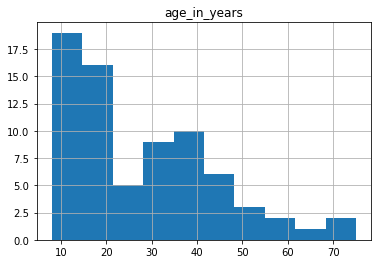

In [11]:
df.hist(column='age_in_years')

In [12]:
df20less = df[df['age_in_years']<22]
print(df20less.count())
df20less.sort_values(by=['PatientID'])

PatientID           36
PatientBirthDate    36
AcquisitionDate     36
age_in_days         36
age_in_years        36
dtype: int64


,PatientID,PatientBirthDate,AcquisitionDate,age_in_days,age_in_years
50,20201023151105049,2004-02-22,2020-10-23,6088 days,16.679452
30,20210128155433922,2005-09-21,2021-01-28,5608 days,15.364384
15,20210309142219315,2001-09-19,2021-03-09,7111 days,19.482192
32,20210326150602233,2008-11-19,2021-03-26,4510 days,12.356164
39,20210414163011357,2009-12-10,2021-04-14,4143 days,11.350685
14,20210420163154257,2005-08-26,2021-04-20,5716 days,15.660274
29,20210421162806019,2003-05-21,2021-04-21,6545 days,17.931507
6,20210421165734615,2007-09-14,2021-04-21,4968 days,13.610959
42,20210428141318511,2000-12-26,2021-04-28,7428 days,20.350685
62,20210506171924096,2004-06-19,2021-05-06,6165 days,16.890411


In [13]:
import shutil
import os

# Selects 22Under images and add them to the specified folder
for i in df20less.index:

    PatientID = df20less['PatientID'][i]
    src = cwd + '/data/'+PatientID+'.jpg'
    dst = cwd + '/data/22Under/'+PatientID+'.jpg'
    
    try:
        shutil.copyfile(src, dst)
        os.remove(src)
    except:
        print('não existe')